In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
# If Colab printed "Saving Crop_recommendation.csv to Crop_recommendation.csv"
df = pd.read_csv("Crop_recommendation.csv")

# If it printed something like "Crop_recommendation (1).csv",
# then use that name instead:
# df = pd.read_csv("Crop_recommendation (1).csv")

df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print("Shape (rows, columns):", df.shape)
df.info()


Shape (rows, columns): (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of duplicate rows: 0


In [ ]:
df = df.drop_duplicates()
df.shape


(2200, 8)

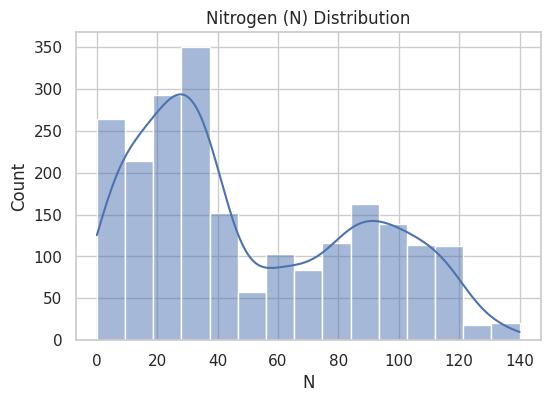

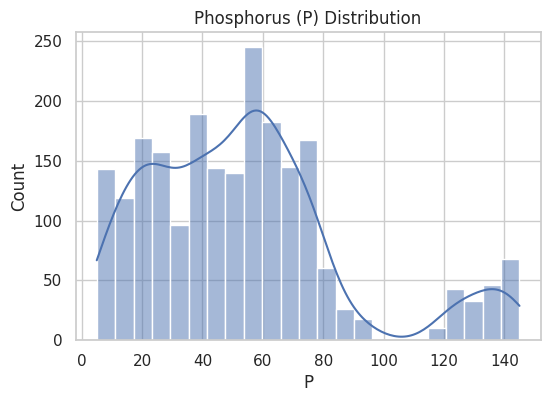

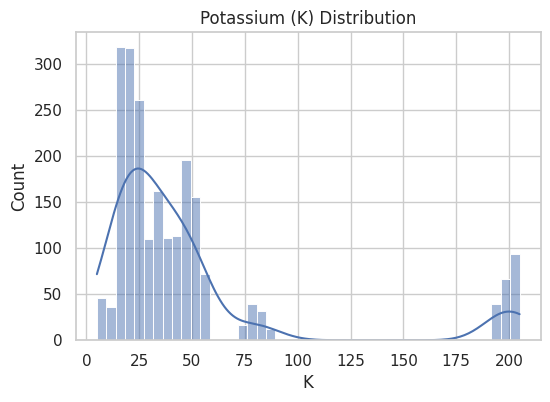

In [ ]:
# Nitrogen
plt.figure(figsize=(6,4))
sns.histplot(df['N'], kde=True)
plt.title("Nitrogen (N) Distribution")
plt.show()

# Phosphorus
plt.figure(figsize=(6,4))
sns.histplot(df['P'], kde=True)
plt.title("Phosphorus (P) Distribution")
plt.show()

# Potassium
plt.figure(figsize=(6,4))
sns.histplot(df['K'], kde=True)
plt.title("Potassium (K) Distribution")
plt.show()


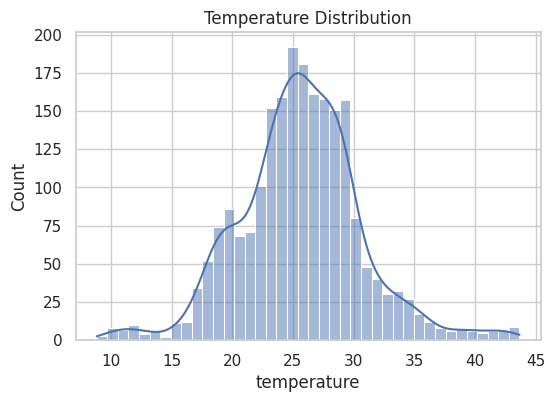

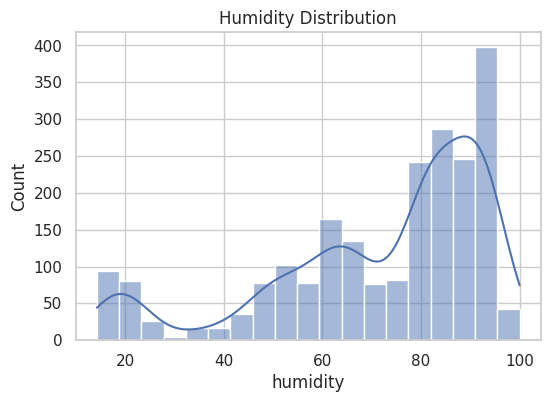

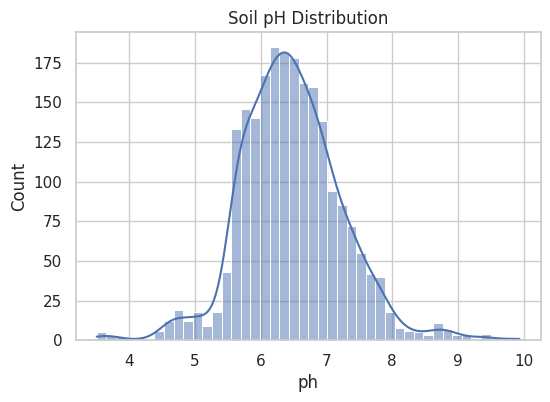

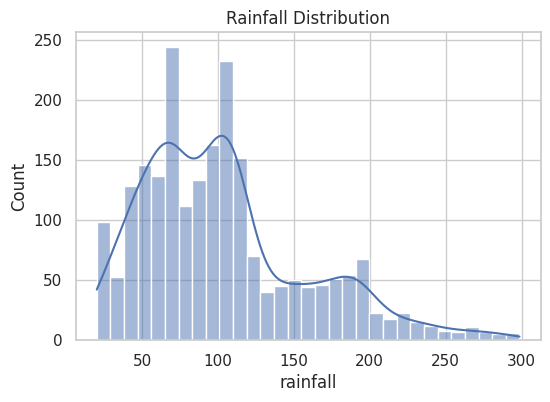

In [ ]:
# Temperature
plt.figure(figsize=(6,4))
sns.histplot(df['temperature'], kde=True)
plt.title("Temperature Distribution")
plt.show()

# Humidity
plt.figure(figsize=(6,4))
sns.histplot(df['humidity'], kde=True)
plt.title("Humidity Distribution")
plt.show()

# pH
plt.figure(figsize=(6,4))
sns.histplot(df['ph'], kde=True)
plt.title("Soil pH Distribution")
plt.show()

# Rainfall
plt.figure(figsize=(6,4))
sns.histplot(df['rainfall'], kde=True)
plt.title("Rainfall Distribution")
plt.show()


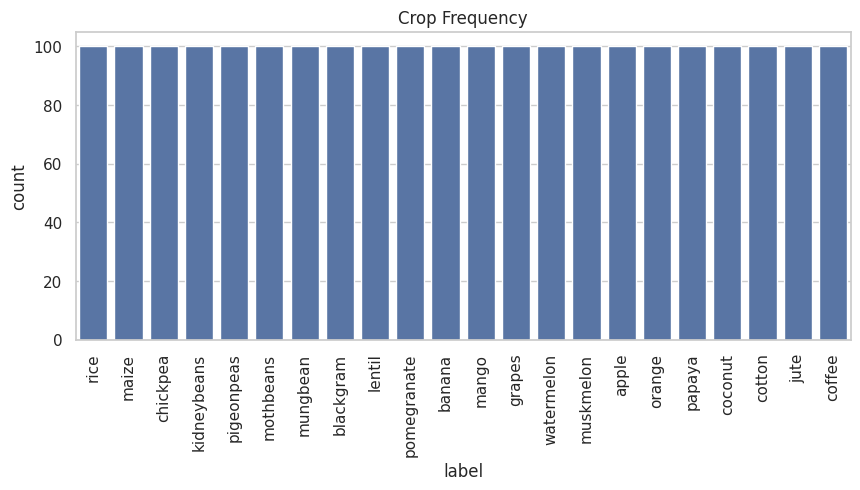

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.title("Crop Frequency")
plt.show()


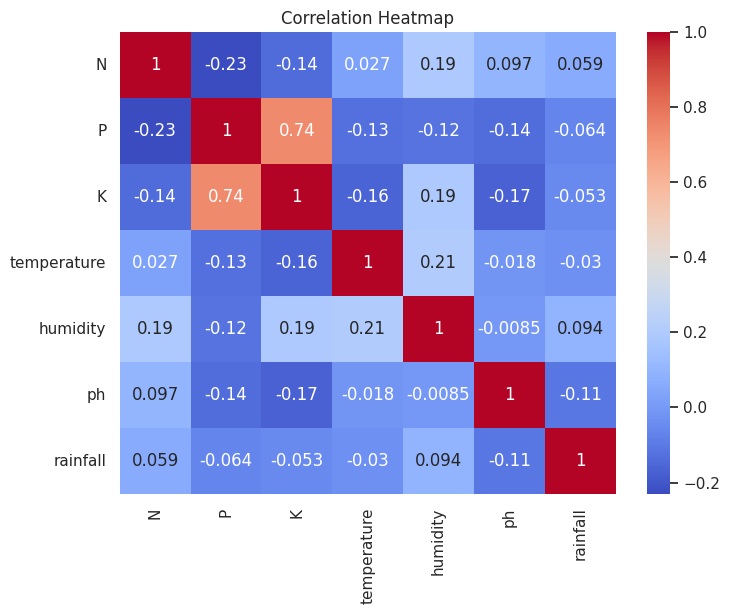

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['N','P','K','temperature','humidity','ph','rainfall']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


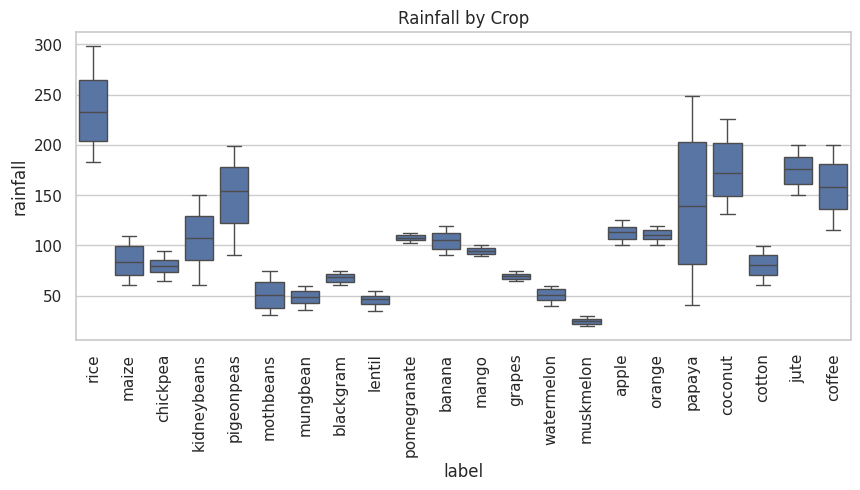

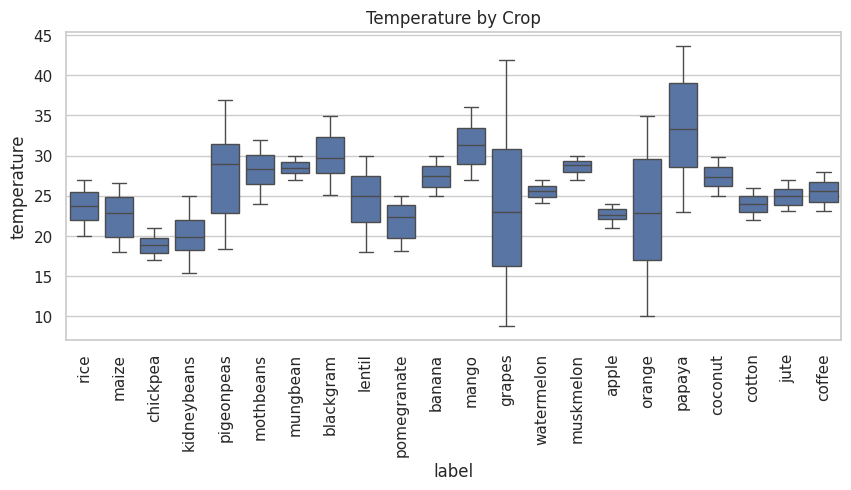

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=90)
plt.title("Rainfall by Crop")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title("Temperature by Crop")
plt.show()


In [ ]:
df['nutrient_index'] = (df['N'] + df['P'] + df['K']) / 3
df[['N','P','K','nutrient_index']].head()


,N,P,K,nutrient_index
0,90,42,43,58.333333
1,85,58,41,61.333333
2,60,55,44,53.000000
3,74,35,40,49.666667
4,78,42,42,54.000000


In [ ]:
print("Number of unique crops:", df['label'].nunique())
print("Crops:", df['label'].unique())

print("\nAverage values:")
print(df[['N','P','K','temperature','humidity','ph','rainfall']].mean())


Number of unique crops: 22
Crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Average values:
N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64
